# LDA Topic Modeling of Covid-19 News Coverages

#### By Joyce Jiang | Code by Joyce


Declare: My code is adopted from marcmuon/nlp_yelp_review_unsupervised github repo, you can check it out at https://github.com/marcmuon/nlp_yelp_review_unsupervised/blob/master/notebooks/2-train_corpus_prep_and_LDA_train.ipynb.

Thanks marcmuon for sharing a Python code. I modified this script by combining it with functions to identify domainant topics of each articles. My topic analysis method is inspired by Selva Prabhakaran's "Topic Modeling with Gensim (Python)", you can check it out at https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#19findthemostrepresentativedocumentforeachtopic. 

This script is published for study and research exploration purpose only, and it would not be used for any commercial purpose.

In [1]:
import pandas as pd
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import spacy
import pandas as pd
import nltk; nltk.download('stopwords')
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import warnings
from pprint import pprint
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanrujiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_excel('../Output/TotalNews_Covid+Corona_non-AFP-w-Uganda.xlsx')

In [3]:
df=df.reset_index()
df

,index,Unnamed: 0,media,headline,author,date,text,news_url,id,content,wordcount
0,0,0,Chimp Reports,"IFFs: Are Tax Exemptions, Incentives a Mixed B...",Esther Makula,"June 18, 2020",[<p>Uganda’s track record of granting tax ince...,https://chimpreports.com/iffs-are-tax-exemptio...,1,Uganda’s track record of granting tax incentiv...,659
1,1,1,Chimp Reports,Breaking: Uganda Bans ‘Truck Drivers Without N...,Kim Aine,"May 16, 2020","[<p class=""p2""><span class=""s1"">The Ugandan go...",https://chimpreports.com/breaking-uganda-bans-...,2,The Ugandan government will not allow any truc...,401
2,2,2,Chimp Reports,Bukedea Has No Confirmed Coronavirus Cases Yet...,Benjamen Emuk,"April 23, 2020",[<p>Bukedea District Police Commander SP Ezra ...,https://chimpreports.com/bukedea-has-no-confir...,3,Bukedea District Police Commander SP Ezra Tugu...,750
3,3,3,Chimp Reports,GEO POLL: 60% of Ugandans ‘Strongly Agree’ Gov...,Kim Aine,"April 22, 2020",[<p>Majority of Ugandans believe government ha...,https://chimpreports.com/geo-poll-60-of-uganda...,4,Majority of Ugandans believe government has do...,538
4,4,4,Chimp Reports,Uganda’s Security Track Down Coronavirus Posit...,Arafat Nzito,"April 16, 2020","[<p class=""p2""><span class=""s1"">Uganda’s secur...",https://chimpreports.com/ugandas-security-trac...,5,Uganda’s security services have intercepted th...,227
5,5,5,Chimp Reports,Suspected Coronavirus Patients hide from Ntung...,George Asiimwe,"April 15, 2020","[<p data-originalcomputedfontsize=""13.69600009...",https://chimpreports.com/suspected-coronavirus...,6,Authorities in Ntungamo District are strugglin...,293
6,6,6,Chimp Reports,"Coronavirus: Burundi Finally Gives in, Suspend...",Kigozi Brazilian,"April 15, 2020",[<p>The Burundi Football Federation (BFF) has ...,https://chimpreports.com/coronavirus-burundi-f...,7,The Burundi Football Federation (BFF) has fina...,239
7,7,7,Chimp Reports,East African Leaders to Discuss Joint Response...,Sully Mugabi,"April 15, 2020","[<p class=""p2"">East African leaders are expect...",https://chimpreports.com/east-african-leaders-...,8,East African leaders are expected to meet this...,431
8,8,8,Chimp Reports,Video: Trump Halts U.S. Funding to WHO over Co...,Sully Mugabi,"April 15, 2020","[<p class=""p2""><span class=""s1"">United States ...",https://chimpreports.com/video-trump-halts-u-s...,9,United States President Donald Trump is haltin...,422
9,9,9,Chimp Reports,DETAILS: Shs 638Bn Separate Supplementary Plan...,Dickens H Okello,"April 8, 2020","[<p class=""p1""><span class=""s2"">Parliament on ...",https://chimpreports.com/details-shs-638bn-sep...,10,Parliament on Tuesday evening hastily passed n...,398


In [10]:
headlines=[]
for x in df.headline:
    headlines.append(str(x))

df['headline']=headlines

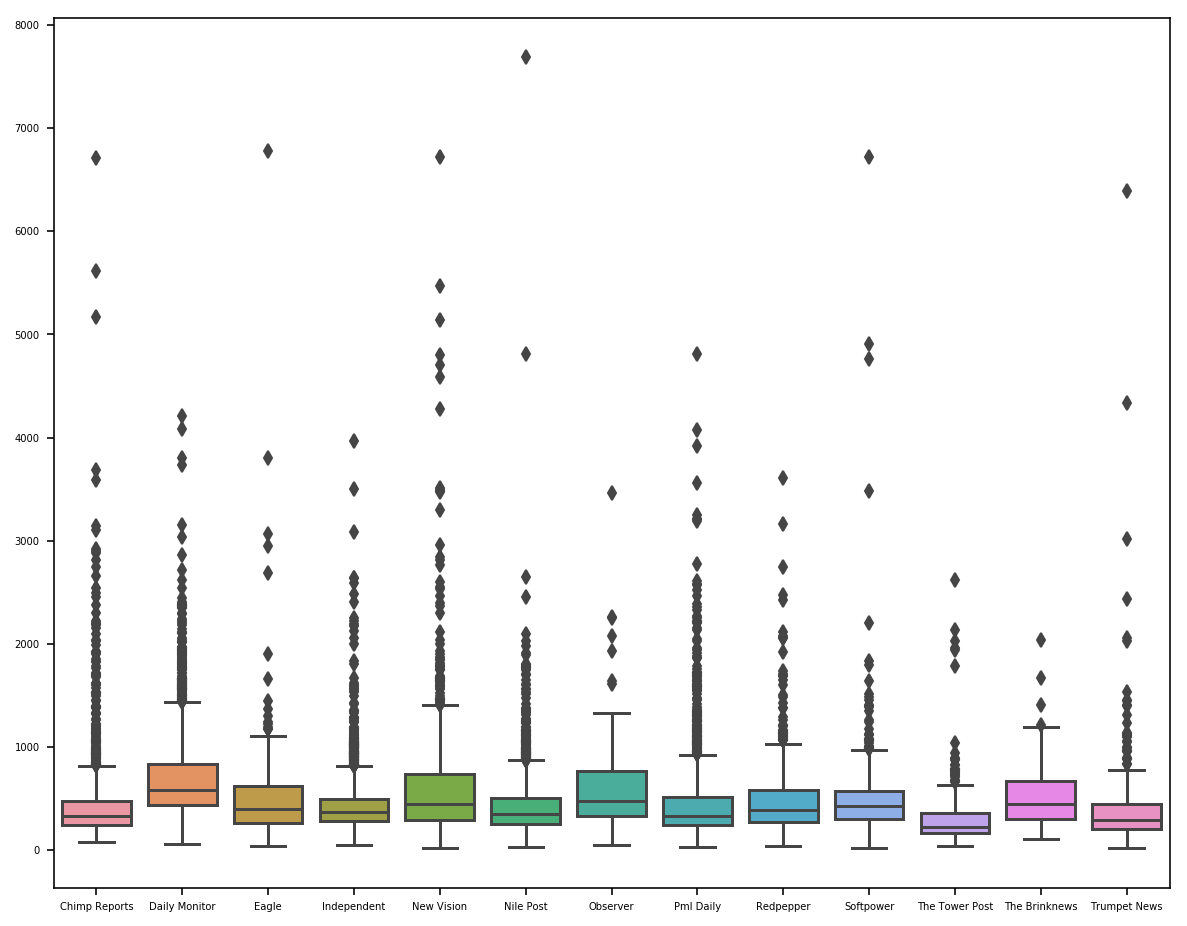

In [8]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.boxplot(x = 'media', y = 'wordcount', data = df)
plt.ylabel('')
plt.xlabel('');

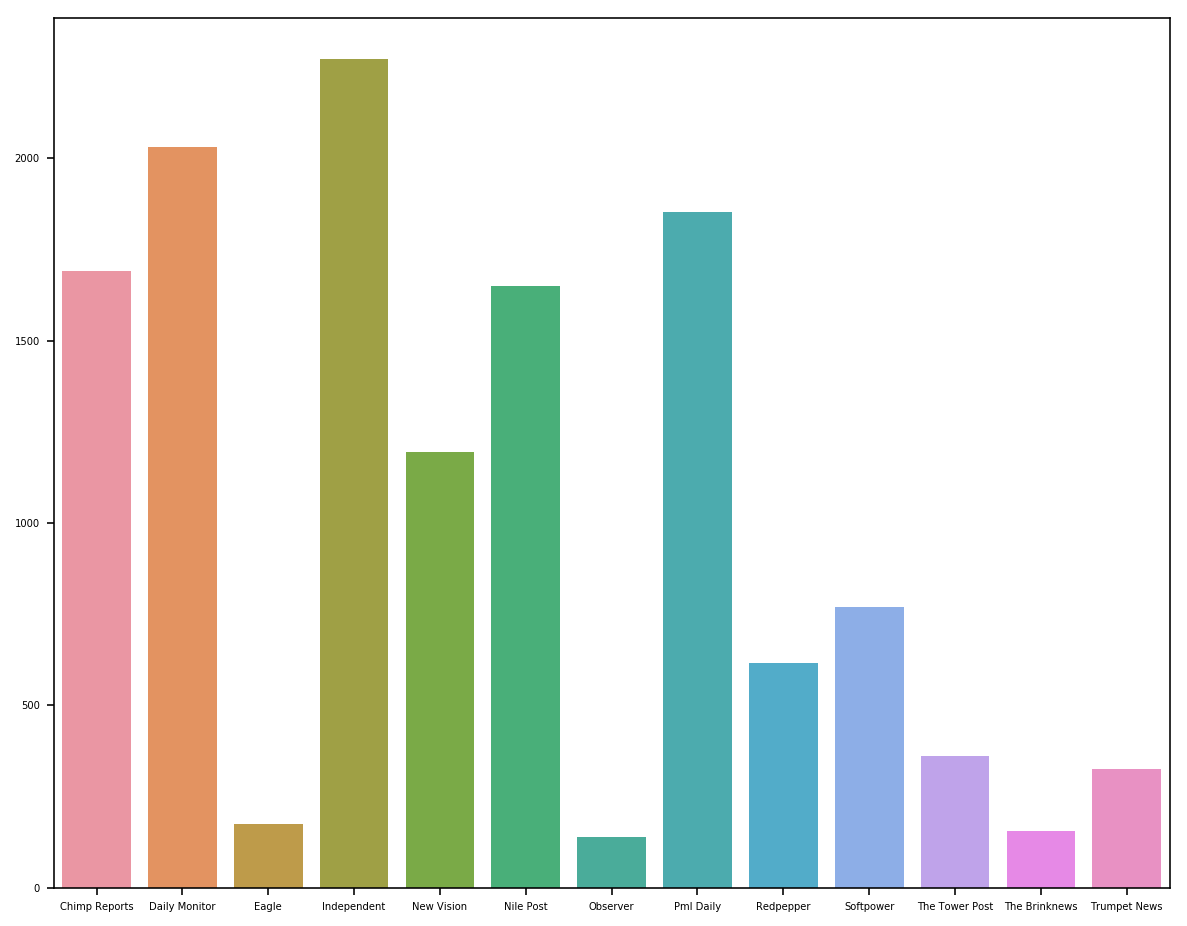

In [9]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.countplot('media', data = df)
plt.ylabel('')
plt.xlabel('');

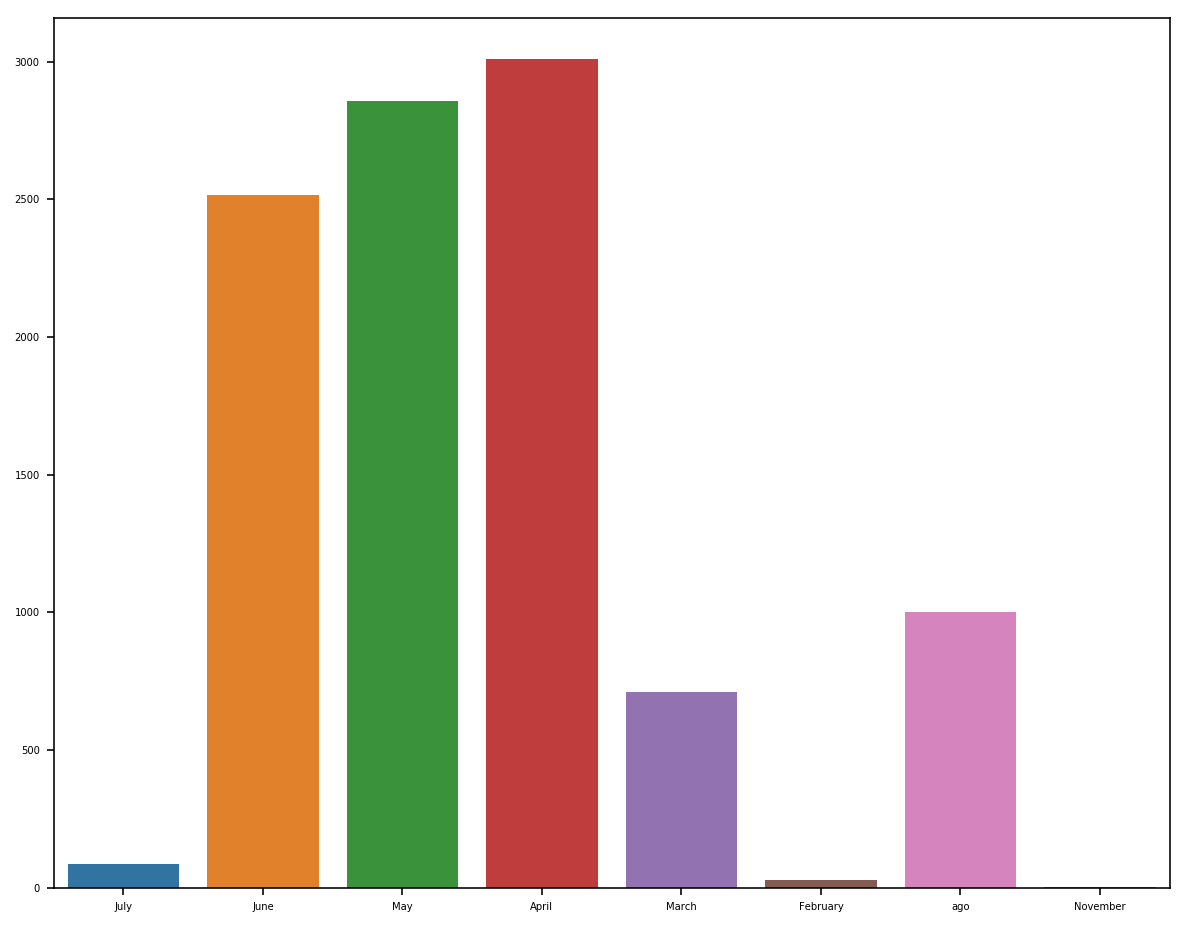

In [21]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.countplot('month', data = df)
plt.ylabel('')
plt.xlabel('');

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['http','www','span','class','space','href','com','src','twsrc','etfw','lang','en',
                  'hashtag','amp','ref','async','service','hashtag','independent','font','style','text','sh','em',
                   'https','content','uploads','img','jpg','alt','wp','alignnone','image','size','full','srcset'
                  ,'px','width','height','sizes','vw','srcset','underline','decoration','data','many','much','may',
                  'us','even','could','need','know','work','way','must','most','good','going','well','work','see',
                  'id','apple','converted','hash','ref','like','would','get','make','think','thing','things','go','take',
                  'still','come','want','mr','msnormal','ms','id','people','since','says','say','apple','converted','two',
                  'according','use','like','would','get','life','make','think','true','things','thing','day','go',
                  'take','first','come','want','never','br','dir','ltrhash','ref','src','due','utf','platform','would',
                  'summary','noprint','reportedly','gone','msonormal','ug','wa','bumpedfont'])

In [14]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [15]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [54]:
# def lemmatization(texts, allowed_postags=['NOUN','ADV']):
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [20]:
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    
    df['content'] = strip_newline(df.content)
    words = list(sent_to_words(df.content))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[review] for review in words]
#     lemma = lemmatization(bigram)
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [21]:
train_corpus4, train_id2word4, bigram_train4 = get_corpus(df)

In [22]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train4 = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus4,
                           num_topics=15,
                           id2word=train_id2word4,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=70,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train4.save('lda_train4_content.model')

In [23]:
# Our final LDA model (for now)
lda_train4.print_topics(num_words=20)


[(0,
  '0.005*"home" + 0.004*"family" + 0.004*"world" + 0.004*"god" + 0.003*"lockdown" + 0.003*"always" + 0.003*"back" + 0.003*"let" + 0.003*"best" + 0.003*"every" + 0.002*"give" + 0.002*"right" + 0.002*"new" + 0.002*"without" + 0.002*"another" + 0.002*"made" + 0.002*"man" + 0.002*"times" + 0.002*"church" + 0.002*"big"'),
 (1,
  '0.019*"support" + 0.013*"food" + 0.008*"pandemic" + 0.007*"help" + 0.007*"response" + 0.006*"communities" + 0.006*"covid_pandemic" + 0.006*"national" + 0.006*"donated" + 0.005*"million" + 0.005*"efforts" + 0.005*"ministry_health" + 0.005*"vulnerable" + 0.005*"community" + 0.005*"ensure" + 0.005*"ugandans" + 0.004*"donation" + 0.004*"kampala" + 0.004*"families" + 0.004*"women"'),
 (2,
  '0.020*"court" + 0.009*"kampala" + 0.007*"traders" + 0.006*"market" + 0.006*"lawyers" + 0.006*"lockdown" + 0.006*"justice" + 0.005*"case" + 0.005*"vendors" + 0.005*"law" + 0.004*"bail" + 0.004*"accused" + 0.004*"tenants" + 0.004*"landlords" + 0.004*"judge" + 0.004*"zaake" + 0.00

In [24]:
#Get percentage data for each topic in each article

all_topics = lda_train4.get_document_topics(train_corpus4, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

In [25]:
 all_topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,0.086136,0.000202,0.000202,0.000202,0.000202,0.000202,0.085037,0.749653,0.076955
1,0.038973,0.000407,0.000407,0.000407,0.629473,0.000407,0.000407,0.000407,0.000407,0.124094,0.113762,0.000407,0.089628,0.000407,0.000407
2,0.143297,0.112554,0.008654,0.000232,0.103389,0.000232,0.029875,0.000232,0.000232,0.117170,0.455500,0.027938,0.000232,0.000232,0.000232
3,0.000290,0.000290,0.000290,0.000290,0.000290,0.000290,0.132670,0.025800,0.000290,0.082100,0.000290,0.000290,0.527502,0.229024,0.000290
4,0.000814,0.000814,0.000814,0.000814,0.813457,0.000814,0.000814,0.000814,0.000814,0.000814,0.175962,0.000814,0.000814,0.000814,0.000814
5,0.142286,0.000681,0.000681,0.100073,0.309405,0.000681,0.000681,0.000681,0.000681,0.000681,0.440743,0.000681,0.000681,0.000681,0.000681
6,0.016656,0.000584,0.000584,0.695303,0.093870,0.000584,0.000584,0.110428,0.020568,0.000584,0.000584,0.000584,0.057922,0.000584,0.000584
7,0.017304,0.000371,0.000371,0.063918,0.494687,0.000371,0.000371,0.000371,0.000371,0.138279,0.000371,0.000371,0.217996,0.000371,0.064476
8,0.013916,0.115726,0.000364,0.000364,0.000364,0.000364,0.106704,0.050831,0.000364,0.000364,0.000364,0.000364,0.620522,0.014714,0.074678
9,0.000363,0.000363,0.000363,0.000363,0.031547,0.009296,0.000363,0.000363,0.000363,0.043854,0.000363,0.000363,0.000363,0.153410,0.758264


In [104]:
#all_topics_df['headline']=df.headline
#all_topics_df['content']=df.content
#all_topics_df.to_excel('Output/Topic_Assign_Matrix_Detail_20Clusters.xlsx')

### Finding the dominant topic in each sentence
Source of code: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#19findthemostrepresentativedocumentforeachtopic

In [26]:
def format_topics_sentences(ldamodel=lda_train4, corpus=train_corpus4, lines=df.headline, texts=df.content, medias=df.media, authors=df.author, dates=df.date, urls=df.news_url, wordcounts=df.wordcount):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
#    headlines = pd.Series(lines)
#    contents = pd.Series(texts)
    sent_topics_df['media']=medias
    sent_topics_df['author']=authors
    sent_topics_df['date']=dates
    sent_topics_df['headline']=lines
    sent_topics_df['content']=texts
    sent_topics_df['URL']=urls
    sent_topics_df['wordcount']=wordcounts
    
#    sent_topics_df = pd.concat([sent_topics_df, headlines, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_train4, corpus=train_corpus4, lines=df.headline, texts=df.content, medias=df.media, authors=df.author, dates=df.date, urls=df.news_url, wordcounts=df.wordcount)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Media', 'Author','Date','Headline','Content','URL','Wordcount']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Media,Author,Date,Headline,Content,URL,Wordcount
0,0,13.0,0.7496,"business, economy, businesses, per_cent, pande...",Chimp Reports,Esther Makula,"June 18, 2020","IFFs: Are Tax Exemptions, Incentives a Mixed B...",Uganda’s track record of granting tax incentiv...,https://chimpreports.com/iffs-are-tax-exemptio...,659
1,1,4.0,0.6295,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Kim Aine,"May 16, 2020",Breaking: Uganda Bans ‘Truck Drivers Without N...,The Ugandan government will not allow any truc...,https://chimpreports.com/breaking-uganda-bans-...,401
2,2,10.0,0.4555,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,Benjamen Emuk,"April 23, 2020",Bukedea Has No Confirmed Coronavirus Cases Yet...,Bukedea District Police Commander SP Ezra Tugu...,https://chimpreports.com/bukedea-has-no-confir...,750
3,3,12.0,0.5275,"countries, africa, china, virus, world, pandem...",Chimp Reports,Kim Aine,"April 22, 2020",GEO POLL: 60% of Ugandans ‘Strongly Agree’ Gov...,Majority of Ugandans believe government has do...,https://chimpreports.com/geo-poll-60-of-uganda...,538
4,4,4.0,0.8135,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Arafat Nzito,"April 16, 2020",Uganda’s Security Track Down Coronavirus Posit...,Uganda’s security services have intercepted th...,https://chimpreports.com/ugandas-security-trac...,227
5,5,10.0,0.4407,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,George Asiimwe,"April 15, 2020",Suspected Coronavirus Patients hide from Ntung...,Authorities in Ntungamo District are strugglin...,https://chimpreports.com/suspected-coronavirus...,293
6,6,3.0,0.6953,"league, players, club, sports, football, seaso...",Chimp Reports,Kigozi Brazilian,"April 15, 2020","Coronavirus: Burundi Finally Gives in, Suspend...",The Burundi Football Federation (BFF) has fina...,https://chimpreports.com/coronavirus-burundi-f...,239
7,7,4.0,0.4947,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Sully Mugabi,"April 15, 2020",East African Leaders to Discuss Joint Response...,East African leaders are expected to meet this...,https://chimpreports.com/east-african-leaders-...,431
8,8,12.0,0.6205,"countries, africa, china, virus, world, pandem...",Chimp Reports,Sully Mugabi,"April 15, 2020",Video: Trump Halts U.S. Funding to WHO over Co...,United States President Donald Trump is haltin...,https://chimpreports.com/video-trump-halts-u-s...,422
9,9,14.0,0.7583,"parliament, money, mps, president, shs, member...",Chimp Reports,Dickens H Okello,"April 8, 2020",DETAILS: Shs 638Bn Separate Supplementary Plan...,Parliament on Tuesday evening hastily passed n...,https://chimpreports.com/details-shs-638bn-sep...,398


In [27]:
df_dominant_topic_1st=df_dominant_topic
df_dominant_topic_1st

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Media,Author,Date,Headline,Content,URL,Wordcount
0,0,13.0,0.7496,"business, economy, businesses, per_cent, pande...",Chimp Reports,Esther Makula,"June 18, 2020","IFFs: Are Tax Exemptions, Incentives a Mixed B...",Uganda’s track record of granting tax incentiv...,https://chimpreports.com/iffs-are-tax-exemptio...,659
1,1,4.0,0.6295,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Kim Aine,"May 16, 2020",Breaking: Uganda Bans ‘Truck Drivers Without N...,The Ugandan government will not allow any truc...,https://chimpreports.com/breaking-uganda-bans-...,401
2,2,10.0,0.4555,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,Benjamen Emuk,"April 23, 2020",Bukedea Has No Confirmed Coronavirus Cases Yet...,Bukedea District Police Commander SP Ezra Tugu...,https://chimpreports.com/bukedea-has-no-confir...,750
3,3,12.0,0.5275,"countries, africa, china, virus, world, pandem...",Chimp Reports,Kim Aine,"April 22, 2020",GEO POLL: 60% of Ugandans ‘Strongly Agree’ Gov...,Majority of Ugandans believe government has do...,https://chimpreports.com/geo-poll-60-of-uganda...,538
4,4,4.0,0.8135,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Arafat Nzito,"April 16, 2020",Uganda’s Security Track Down Coronavirus Posit...,Uganda’s security services have intercepted th...,https://chimpreports.com/ugandas-security-trac...,227
5,5,10.0,0.4407,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,George Asiimwe,"April 15, 2020",Suspected Coronavirus Patients hide from Ntung...,Authorities in Ntungamo District are strugglin...,https://chimpreports.com/suspected-coronavirus...,293
6,6,3.0,0.6953,"league, players, club, sports, football, seaso...",Chimp Reports,Kigozi Brazilian,"April 15, 2020","Coronavirus: Burundi Finally Gives in, Suspend...",The Burundi Football Federation (BFF) has fina...,https://chimpreports.com/coronavirus-burundi-f...,239
7,7,4.0,0.4947,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Sully Mugabi,"April 15, 2020",East African Leaders to Discuss Joint Response...,East African leaders are expected to meet this...,https://chimpreports.com/east-african-leaders-...,431
8,8,12.0,0.6205,"countries, africa, china, virus, world, pandem...",Chimp Reports,Sully Mugabi,"April 15, 2020",Video: Trump Halts U.S. Funding to WHO over Co...,United States President Donald Trump is haltin...,https://chimpreports.com/video-trump-halts-u-s...,422
9,9,14.0,0.7583,"parliament, money, mps, president, shs, member...",Chimp Reports,Dickens H Okello,"April 8, 2020",DETAILS: Shs 638Bn Separate Supplementary Plan...,Parliament on Tuesday evening hastily passed n...,https://chimpreports.com/details-shs-638bn-sep...,398


In [28]:
#Find the second domainant topic in each article

counts=[]

def format_topics_sentences(ldamodel=lda_train4, corpus=train_corpus4, lines=df.headline, texts=df.content, medias=df.media, authors=df.author, dates=df.date, urls=df.news_url, wordcounts=df.wordcount):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
#        row2= sorted(row, key=lambda x: (x[2]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                counts.append('domain')
            elif j == 1:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
#    headlines = pd.Series(lines)
#    contents = pd.Series(texts)
    sent_topics_df['media']=medias
    sent_topics_df['author']=authors
    sent_topics_df['date']=dates
    sent_topics_df['headline']=lines
    sent_topics_df['content']=texts
    sent_topics_df['URL']=urls
    sent_topics_df['wordcount']=wordcounts
    
#    sent_topics_df = pd.concat([sent_topics_df, headlines, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_train4, corpus=train_corpus4, lines=df.headline, texts=df.content, medias=df.media, authors=df.author, dates=df.date, urls=df.news_url, wordcounts=df.wordcount)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Media', 'Author','Date','Headline','Content','URL','Wordcount']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Media,Author,Date,Headline,Content,URL,Wordcount
0,0,6.0,0.0861,"virus, disease, dr, patients, treatment, publi...",Chimp Reports,Esther Makula,"June 18, 2020","IFFs: Are Tax Exemptions, Incentives a Mixed B...",Uganda’s track record of granting tax incentiv...,https://chimpreports.com/iffs-are-tax-exemptio...,659
1,1,9.0,0.1241,"president, lockdown, museveni, measures, presi...",Chimp Reports,Kim Aine,"May 16, 2020",Breaking: Uganda Bans ‘Truck Drivers Without N...,The Ugandan government will not allow any truc...,https://chimpreports.com/breaking-uganda-bans-...,401
2,2,0.0,0.1433,"home, family, world, god, lockdown, always, ba...",Chimp Reports,Benjamen Emuk,"April 23, 2020",Bukedea Has No Confirmed Coronavirus Cases Yet...,Bukedea District Police Commander SP Ezra Tugu...,https://chimpreports.com/bukedea-has-no-confir...,750
3,3,13.0,0.2290,"business, economy, businesses, per_cent, pande...",Chimp Reports,Kim Aine,"April 22, 2020",GEO POLL: 60% of Ugandans ‘Strongly Agree’ Gov...,Majority of Ugandans believe government has do...,https://chimpreports.com/geo-poll-60-of-uganda...,538
4,4,10.0,0.1760,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,Arafat Nzito,"April 16, 2020",Uganda’s Security Track Down Coronavirus Posit...,Uganda’s security services have intercepted th...,https://chimpreports.com/ugandas-security-trac...,227
5,5,4.0,0.3094,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,George Asiimwe,"April 15, 2020",Suspected Coronavirus Patients hide from Ntung...,Authorities in Ntungamo District are strugglin...,https://chimpreports.com/suspected-coronavirus...,293
6,6,7.0,0.1104,"media, president, elections, public, museveni,...",Chimp Reports,Kigozi Brazilian,"April 15, 2020","Coronavirus: Burundi Finally Gives in, Suspend...",The Burundi Football Federation (BFF) has fina...,https://chimpreports.com/coronavirus-burundi-f...,239
7,7,12.0,0.2180,"countries, africa, china, virus, world, pandem...",Chimp Reports,Sully Mugabi,"April 15, 2020",East African Leaders to Discuss Joint Response...,East African leaders are expected to meet this...,https://chimpreports.com/east-african-leaders-...,431
8,8,1.0,0.1157,"support, food, pandemic, help, response, commu...",Chimp Reports,Sully Mugabi,"April 15, 2020",Video: Trump Halts U.S. Funding to WHO over Co...,United States President Donald Trump is haltin...,https://chimpreports.com/video-trump-halts-u-s...,422
9,9,13.0,0.1534,"business, economy, businesses, per_cent, pande...",Chimp Reports,Dickens H Okello,"April 8, 2020",DETAILS: Shs 638Bn Separate Supplementary Plan...,Parliament on Tuesday evening hastily passed n...,https://chimpreports.com/details-shs-638bn-sep...,398


In [29]:
df_dominant_topic_1st['Dominant_Topic_2nd']=df_dominant_topic.Dominant_Topic
df_dominant_topic_1st['Topic_Perc_Contrib_2nd']=df_dominant_topic.Topic_Perc_Contrib
df_dominant_topic_1st['Keywords_2nd']=df_dominant_topic.Keywords
df_dominant_topic_1st

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Media,Author,Date,Headline,Content,URL,Wordcount,Dominant_Topic_2nd,Topic_Perc_Contrib_2nd,Keywords_2nd
0,0,13.0,0.7496,"business, economy, businesses, per_cent, pande...",Chimp Reports,Esther Makula,"June 18, 2020","IFFs: Are Tax Exemptions, Incentives a Mixed B...",Uganda’s track record of granting tax incentiv...,https://chimpreports.com/iffs-are-tax-exemptio...,659,6.0,0.0861,"virus, disease, dr, patients, treatment, publi..."
1,1,4.0,0.6295,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Kim Aine,"May 16, 2020",Breaking: Uganda Bans ‘Truck Drivers Without N...,The Ugandan government will not allow any truc...,https://chimpreports.com/breaking-uganda-bans-...,401,9.0,0.1241,"president, lockdown, museveni, measures, presi..."
2,2,10.0,0.4555,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,Benjamen Emuk,"April 23, 2020",Bukedea Has No Confirmed Coronavirus Cases Yet...,Bukedea District Police Commander SP Ezra Tugu...,https://chimpreports.com/bukedea-has-no-confir...,750,0.0,0.1433,"home, family, world, god, lockdown, always, ba..."
3,3,12.0,0.5275,"countries, africa, china, virus, world, pandem...",Chimp Reports,Kim Aine,"April 22, 2020",GEO POLL: 60% of Ugandans ‘Strongly Agree’ Gov...,Majority of Ugandans believe government has do...,https://chimpreports.com/geo-poll-60-of-uganda...,538,13.0,0.2290,"business, economy, businesses, per_cent, pande..."
4,4,4.0,0.8135,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Arafat Nzito,"April 16, 2020",Uganda’s Security Track Down Coronavirus Posit...,Uganda’s security services have intercepted th...,https://chimpreports.com/ugandas-security-trac...,227,10.0,0.1760,"district, hospital, dr, updf, urn, referral_ho..."
5,5,10.0,0.4407,"district, hospital, dr, updf, urn, referral_ho...",Chimp Reports,George Asiimwe,"April 15, 2020",Suspected Coronavirus Patients hide from Ntung...,Authorities in Ntungamo District are strugglin...,https://chimpreports.com/suspected-coronavirus...,293,4.0,0.3094,"cases, ministry_health, truck_drivers, ministr..."
6,6,3.0,0.6953,"league, players, club, sports, football, seaso...",Chimp Reports,Kigozi Brazilian,"April 15, 2020","Coronavirus: Burundi Finally Gives in, Suspend...",The Burundi Football Federation (BFF) has fina...,https://chimpreports.com/coronavirus-burundi-f...,239,7.0,0.1104,"media, president, elections, public, museveni,..."
7,7,4.0,0.4947,"cases, ministry_health, truck_drivers, ministr...",Chimp Reports,Sully Mugabi,"April 15, 2020",East African Leaders to Discuss Joint Response...,East African leaders are expected to meet this...,https://chimpreports.com/east-african-leaders-...,431,12.0,0.2180,"countries, africa, china, virus, world, pandem..."
8,8,12.0,0.6205,"countries, africa, china, virus, world, pandem...",Chimp Reports,Sully Mugabi,"April 15, 2020",Video: Trump Halts U.S. Funding to WHO over Co...,United States President Donald Trump is haltin...,https://chimpreports.com/video-trump-halts-u-s...,422,1.0,0.1157,"support, food, pandemic, help, response, commu..."
9,9,14.0,0.7583,"parliament, money, mps, president, shs, member...",Chimp Reports,Dickens H Okello,"April 8, 2020",DETAILS: Shs 638Bn Separate Supplementary Plan...,Parliament on Tuesday evening hastily passed n...,https://chimpreports.com/details-shs-638bn-sep...,398,13.0,0.1534,"business, economy, businesses, per_cent, pande..."


In [30]:
df_dominant_topic_1st.to_excel('Output/Topic_Assign_15Clusters_details_v6.xlsx')

In [46]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(17)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,9.0,"africa, pandemic, support, world, countries, g...",657.0,0.0497
1,15.0,"kenya, truck_drivers, drivers, rwanda, tanzani...",805.0,0.0608
2,16.0,"cases, ministry_health, patients, virus, minis...",743.0,0.0562
3,12.0,"china, msonormal, countries, africa, chinese, ...",123.0,0.0093
4,15.0,"kenya, truck_drivers, drivers, rwanda, tanzani...",296.0,0.0224
5,10.0,"ministry, staff, ugandans, minister, march, em...",766.0,0.0579
6,16.0,"cases, ministry_health, patients, virus, minis...",959.0,0.0725
7,16.0,"cases, ministry_health, patients, virus, minis...",1371.0,0.1036
8,15.0,"kenya, truck_drivers, drivers, rwanda, tanzani...",535.0,0.0404
9,2.0,"business, economy, per_cent, businesses, bank,...",1463.0,0.1106


In [29]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

In [30]:
sent_topics_sorteddf_mallet['Num_Documents']=topic_counts
sent_topics_sorteddf_mallet['Perc_Documents']=topic_contribution

In [34]:
sent_topics_sorteddf_mallet.to_excel('Output/Topic_Info_20Clusters.xlsx')

In [37]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Headline,Content,Num_Documents,Perc_Documents
0,0.0,0.7130,"media, journalists, online, mtn, social_media,...",HiPipo Awards: Eddy Kenzo Named Artist of the ...,Edrisa Musuuza aka Eddy Kenzo yet again scoope...,256,0.0248
1,1.0,0.8414,"span_class, apple_converted, space_span, weigh...",How URA’s Regional Cargo Tracking System was u...,As a new measure adopted to further combat the...,64,0.0062
2,2.0,0.8149,"president, masks, measures, lockdown, museveni...",KCCA Unveils Tough New Measures for Opening of...,Kampala Capital City Authority (KCCA) has deve...,594,0.0576
3,3.0,0.9780,"police, district, arrested, mr, security, hosp...",UPDF Major Clobbered Unconscious While Enforci...,A UPDF soldier in Kyankwanzi district was Tues...,736,0.0713
4,4.0,0.8750,"china, virus, countries, cases, deaths, chines...",Coronavirus cases top 1 million worldwide,"In Italy, the hardest-hit country in terms of ...",808,0.0783
5,5.0,0.8859,"many, us, even, em, could, need, know, work, m...","Opinion: As we confront Covid-19, death remain...","Jaluum Herberts, What’s your biggest motivator...",1257,0.1218
6,6.0,0.9663,"style_text, players, class_msonormal, clubs, l...",COVID19: Cranes Custodian Odongkara Misses Out...,Uganda Cranes goalkeeper Robert Odongkara has ...,296,0.0287
7,7.0,0.8840,"president, trump, political, elections, public...",Digital campaigns offends pillars on which con...,'Forum for Democratic Change party (FDC) has u...,469,0.0455
8,8.0,0.9306,"span_span, span, class, sh, span_style, span_d...","COVID-19: MTN, NWSC come to the Aid of Water s...",National Water and Sewerage Corporation (NWSC)...,37,0.0036
9,9.0,0.9448,"business, economy, businesses, bank, companies...",Bank of Uganda Reduces CBR as Covid 19 Continu...,The Bank of Uganda (BoU) has reduced the Centr...,963,0.0933


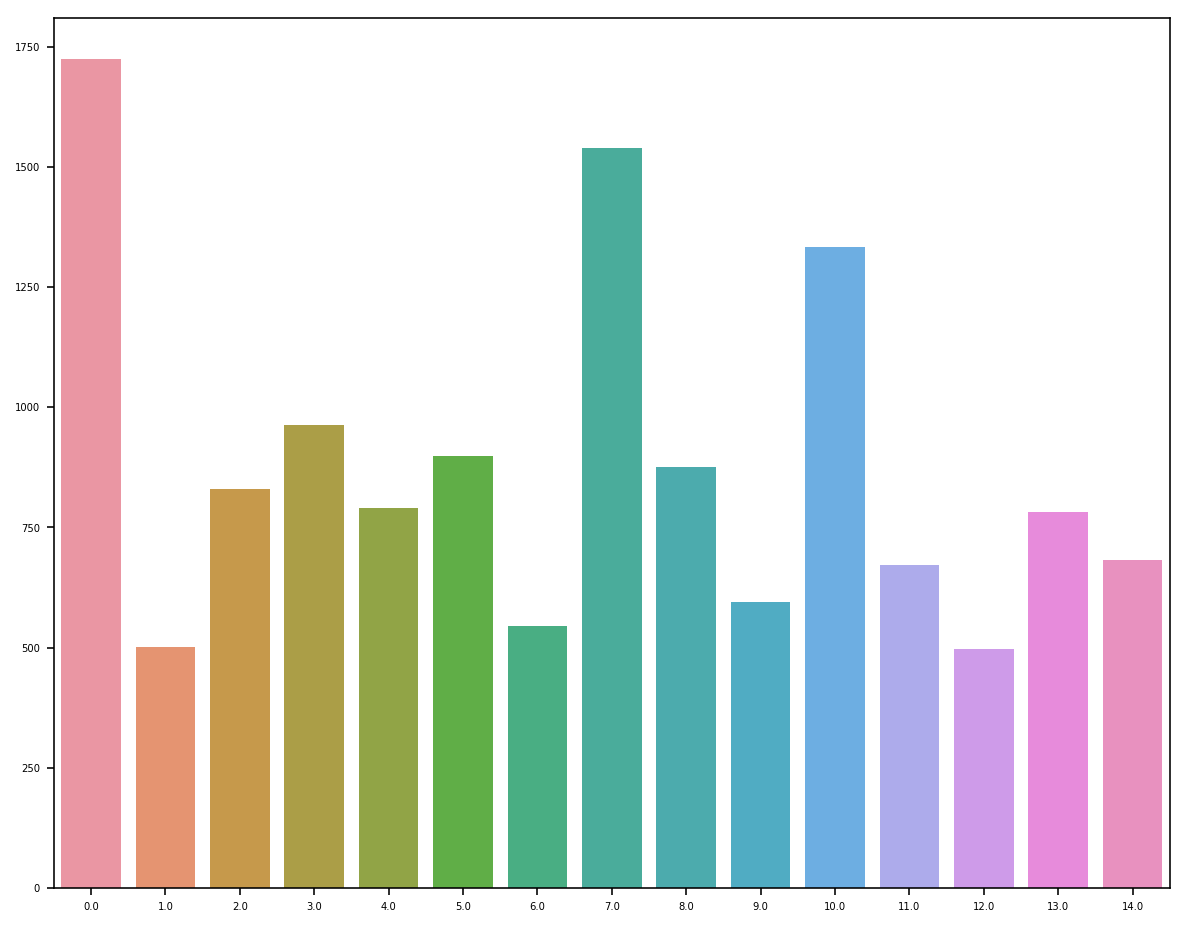

In [68]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.countplot('Dominant_Topic', data = df_dominant_topic_1st)
plt.ylabel('')
plt.xlabel('');

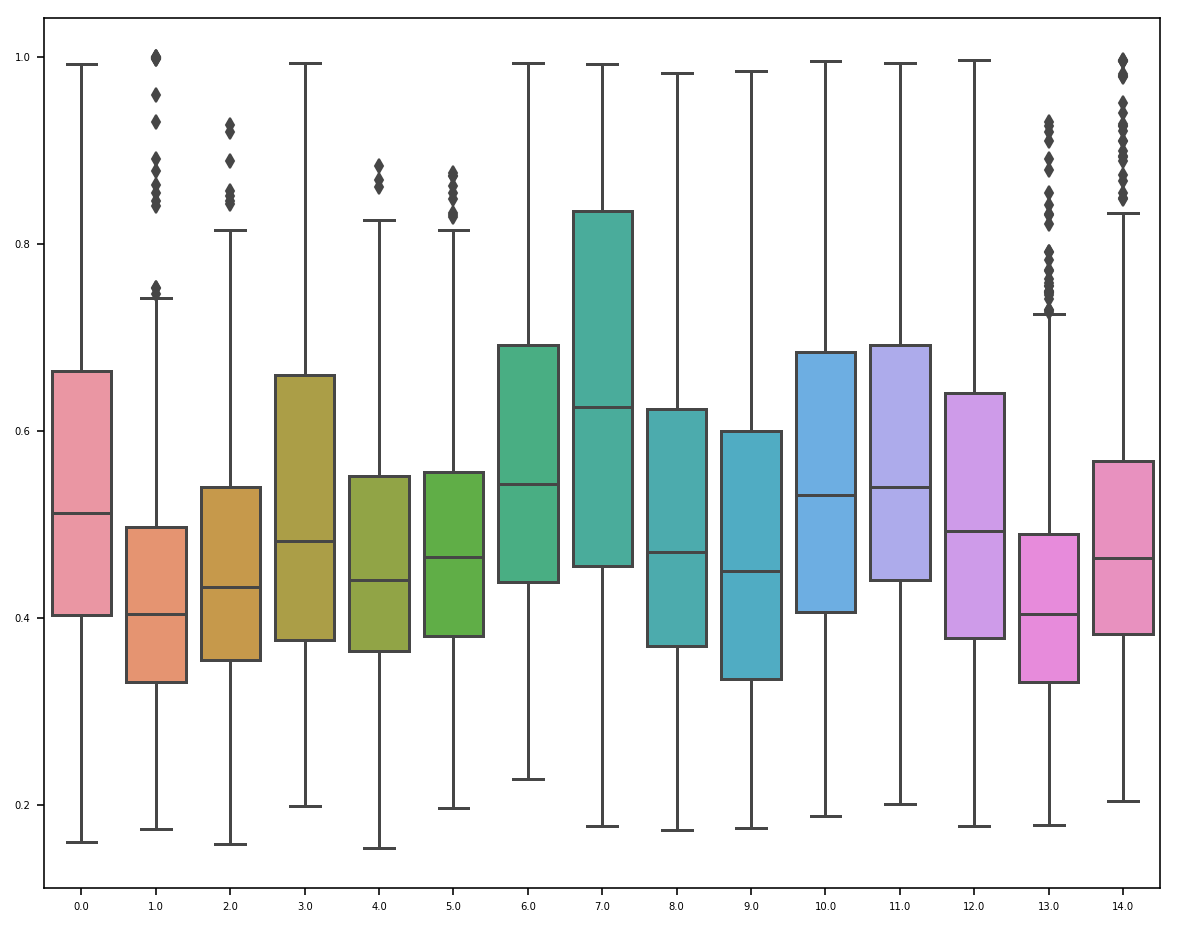

In [69]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.boxplot(x = 'Dominant_Topic', y = 'Topic_Perc_Contrib', data = df_dominant_topic_1st)
plt.ylabel('')
plt.xlabel('');

Text(0.5, 0, '')

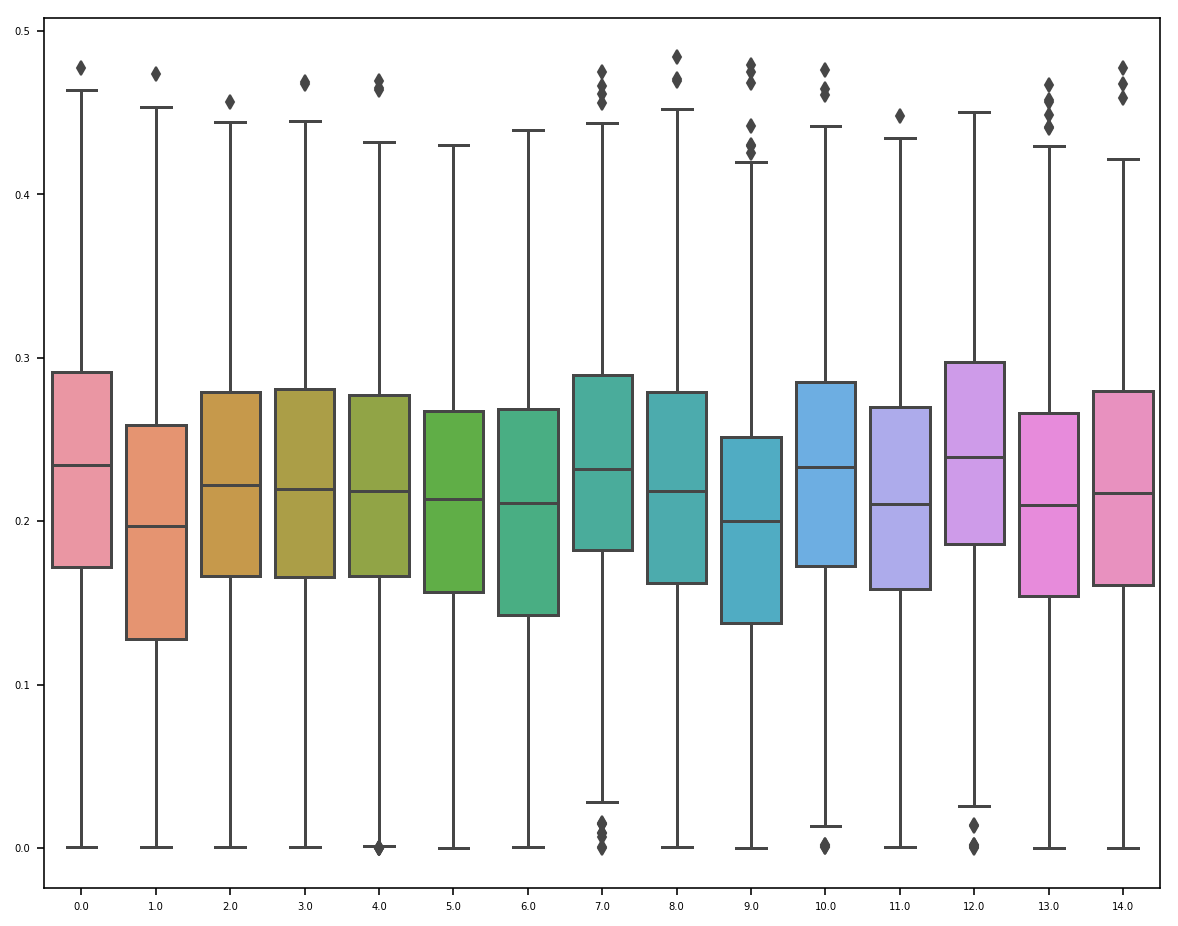

In [70]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.boxplot(x = 'Dominant_Topic_2nd', y = 'Topic_Perc_Contrib_2nd', data = df_dominant_topic_1st)
plt.ylabel('')
plt.xlabel('')

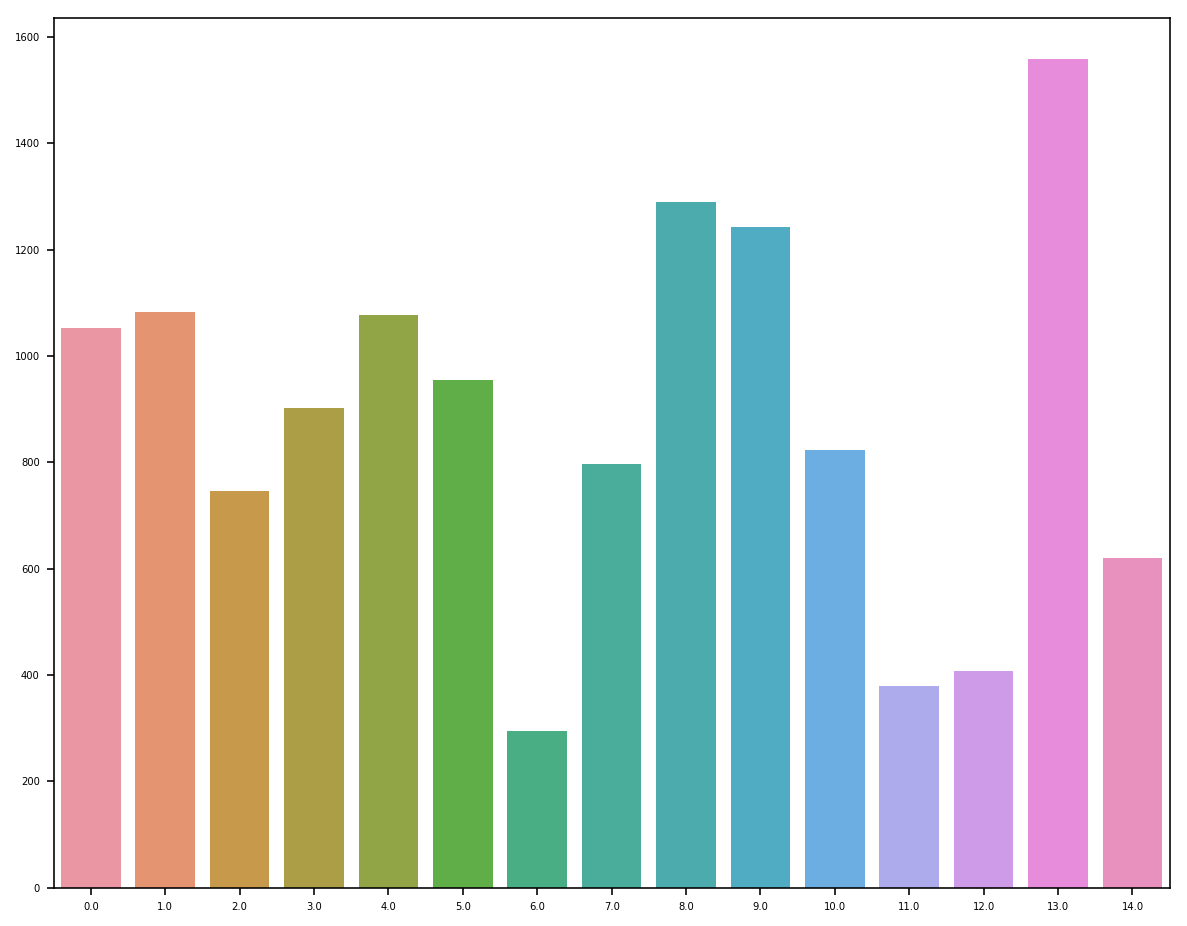

In [71]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 5})
sns.countplot('Dominant_Topic_2nd', data = df_dominant_topic_1st)
plt.ylabel('')
plt.xlabel('');